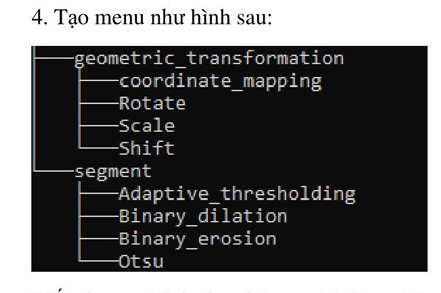
Viết chương trình cho phép người dùng nhập chức năng muốn xử lý. (Có thể chọn 1 chức năng duy nhất hoặc kết hợp 2 chức năng của geometric_transformation và segment)

Chọn chức năng xử lý ảnh:
1: Geometric Transformation
2: Segment
3: Kết hợp cả hai
Chọn chức năng geometric:
1: coordinate_mapping
2: Rotate
3: Scale
4: Shift
Chọn chức năng segment:
1: Adaptive_thresholding
2: Binary_dilation
3: Binary_erosion
4: Otsu


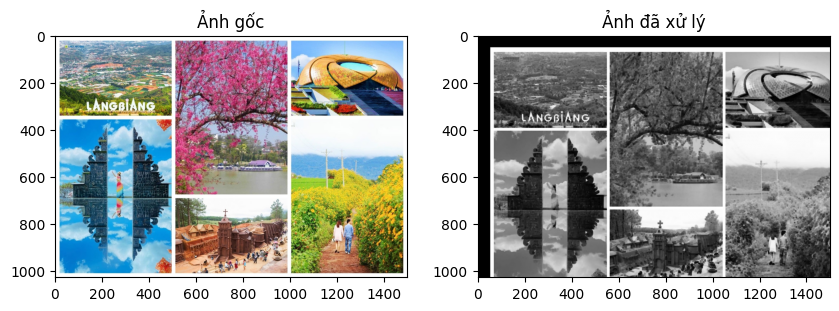

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def geometric_transformation(image, option):
    if option == '1':  # coordinate_mapping
        return 255 - image
    elif option == '2':  # Rotate
        rows, cols = image.shape[:2]
        M = cv2.getRotationMatrix2D((cols/2, rows/2), 45, 1)
        return cv2.warpAffine(image, M, (cols, rows))
    elif option == '3':  # Scale
        return cv2.resize(image, None, fx=0.5, fy=0.5)
    elif option == '4':  # Shift
        M = np.float32([[1, 0, 50], [0, 1, 50]])
        return cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))
    else:
        print("Lựa chọn geometric không hợp lệ.")
        return image

def segment(image, option):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    if option == '1':  # Adaptive_thresholding
        return cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                     cv2.THRESH_BINARY, 11, 2)
    elif option == '2':  # Binary_dilation
        kernel = np.ones((5,5), np.uint8)
        return cv2.dilate(gray, kernel, iterations=1)
    elif option == '3':  # Binary_erosion
        kernel = np.ones((5,5), np.uint8)
        return cv2.erode(gray, kernel, iterations=1)
    elif option == '4':  # Otsu
        _, thres = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        return thres
    else:
        print("Lựa chọn segment không hợp lệ.")
        return gray

# Đọc ảnh đầu vào
image = cv2.imread("exercise/dalat.jpg")  # Thay bằng đường dẫn ảnh của bạn

# Menu lựa chọn
print("Chọn chức năng xử lý ảnh:")
print("1: Geometric Transformation")
print("2: Segment")
print("3: Kết hợp cả hai")

main_choice = input("Nhập lựa chọn (1, 2 hoặc 3): ")

if main_choice == '1':
    print("Chọn chức năng geometric:")
    print("1: coordinate_mapping")
    print("2: Rotate")
    print("3: Scale")
    print("4: Shift")
    sub_choice = input("Nhập lựa chọn (1-4): ")
    processed_image = geometric_transformation(image, sub_choice)

elif main_choice == '2':
    print("Chọn chức năng segment:")
    print("1: Adaptive_thresholding")
    print("2: Binary_dilation")
    print("3: Binary_erosion")
    print("4: Otsu")
    sub_choice = input("Nhập lựa chọn (1-4): ")
    processed_image = segment(image, sub_choice)

elif main_choice == '3':
    print("Chọn chức năng geometric:")
    print("1: coordinate_mapping")
    print("2: Rotate")
    print("3: Scale")
    print("4: Shift")
    geo_choice = input("Nhập lựa chọn geometric (1-4): ")

    print("Chọn chức năng segment:")
    print("1: Adaptive_thresholding")
    print("2: Binary_dilation")
    print("3: Binary_erosion")
    print("4: Otsu")
    seg_choice = input("Nhập lựa chọn segment (1-4): ")

    image_geo = geometric_transformation(image, geo_choice)
    processed_image = segment(image_geo, seg_choice)

else:
    print("Lựa chọn không hợp lệ.")
    processed_image = image

# Hiển thị kết quả
plt.figure(figsize=(10,5))
plt.subplot(1,2,1), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title("Ảnh gốc")
plt.subplot(1,2,2), plt.imshow(processed_image, cmap='gray'), plt.title("Ảnh đã xử lý")
plt.show()
